In [1]:
%pylab inline
from gprfopt_analyze import load_results

def tohex(s):
    r,g,b = s.split(".")
    return "#%02x%02x%02x" % (int(r), int(g), int(b))

dark_grey = tohex("89.89.89")

dark_blue = tohex("31.119.180")
light_blue = tohex("174.199.232")
dark_red = tohex("214.39.40")
light_red = tohex("255.152.150")
dark_purple = tohex("148.103.189")
light_purple = tohex("197.176.213")
dark_brown = tohex("140.86.75")
light_brown = tohex("196.156.148")
dark_green = tohex("44.160.44")
light_green = tohex("152.223.138")

Populating the interactive namespace from numpy and matplotlib


In [2]:
def max_history(r):
    try:
        lls = r[:, 2]
    except:
        return r
    r2 = np.zeros(r.shape)
    for i in range(len(lls)):
        best_so_far = np.argmax(lls[:i+1])
        r2[i,:] = r[best_so_far,:]
    return r2


In [3]:
def convert_mad(r, npts):
    r[:, 4] *= np.sqrt(npts)
    return r
# say lscale is 6.0
# side length is sqrt(N)
# this means I scale all distances by sqrt(N), right. since right now I have side length 1. 

In [4]:
def extend(rs):
    try:
        maxt = np.max([np.max(r[:, 1]) for (label, r) in rs])
    except:
        return rs
    print maxt
    
    def extend_one(r):
        n = r.shape[0]
        r2 = np.zeros((n+1, r.shape[1]))
        r2[:n] = r
        r2[n] = r[-1]
        r2[n, 1] = maxt
        return r2
    return [(label, extend_one(r)) for (label, r) in rs]

# 80k xcov

In [5]:
ds = [("GPRF-800", "/home/dmoore/gprf_experiments/80000_80500_100_0.021213_0.007071_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
("Local-800", "/home/dmoore/gprf_experiments/80000_80500_100_0.021213_0.007071_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
("Local-5000", "/home/dmoore/gprf_experiments/80000_80500_16_0.021213_0.007071_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
("GPRF-400", "/home/dmoore/gprf_experiments/80000_80500_196_0.021213_0.007071_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
("Local-400", "/home/dmoore/gprf_experiments/80000_80500_196_0.021213_0.007071_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
#("Local-36", "/home/dmoore/gprf_experiments/80000_80500_36_0.021213_0.007071_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
#("GPRF-400", "/home/dmoore/gprf_experiments/80000_80500_400_0.021213_0.007071_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
("GPRF-100", "/home/dmoore/gprf_experiments/80000_80500_900_0.021213_0.007071_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
#("Local-400", "/home/dmoore/gprf_experiments/80000_80500_400_0.021213_0.007071_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
("Local-100", "/home/dmoore/gprf_experiments/80000_80500_900_0.021213_0.007071_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0")]

r1 = extend([(label, convert_mad(max_history(load_results(d)), 80000)) for (label, d) in ds])

#r1 = sorted(extend([(label, convert_mad(max_history(load_results(d)), 80000)) for (label, d) in ds]))
r1 = dict(r1)


51108.25


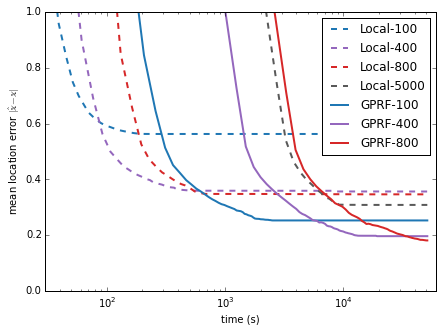

In [6]:
f = plt.figure(figsize=(7, 5))

label_order = ("Local-100", "Local-400", "Local-800", "Local-5000", "GPRF-100", "GPRF-400", "GPRF-800")
for label in label_order:
    try:
        r = r1[label]
    except:
        continue
    marker = None
    if "-5000" in label:
        color = dark_grey
    elif "-800" in label:
        color = dark_red #if "GPRF" in label else light_red
        #marker = "^"
    elif "-400" in label:
        color = dark_purple #if "GPRF" in label else light_blue
        #marker = "D"
    elif "-100" in label:
        color = dark_blue #if "GPRF" in label else light_red
        #marker = "o"
    plot(r[:, 1], r[:, 4], label=label, 
         linestyle = "-" if "GPRF" in label else "--", 
         color=color, lw=2, marker=marker)
    
gca().set_xscale("log")
gca().set_yscale("linear")
gca().set_ylim([0, 1])

gca().set_xlim([30, 6*10**4])

gca().legend(loc="upper right")
gca().set_xlabel("time (s)")
gca().set_ylabel("mean location error $\|\hat{\mathbb{x}}-\mathbb{x}\|$")

# Seismic

In [7]:
seismic_runs = \
[("Local-50", "/home/dmoore/python/gprf/seismic_experiments/-1_61_1.0000_default_x_40_20.0"),
 ("Local-200", "/home/dmoore/python/gprf/seismic_experiments/-1_211_1.0000_default_x_40_20.0"),
 ("Local-800", "/home/dmoore/python/gprf/seismic_experiments/-1_811_1.0000_default_x_40_20.0"),
 ("Local-1600", "/home/dmoore/python/gprf/seismic_experiments/-1_1701_1.0000_default_x_40_20.0"),
 ("Local-3200", "/home/dmoore/python/gprf/seismic_experiments/-1_3401_1.0000_default_x_40_20.0"),
 ("GPRF-50", "/home/dmoore/python/gprf/seismic_experiments/-1_61_0.1000_default_x_40_20.0"),
 ("GPRF-200", "/home/dmoore/python/gprf/seismic_experiments/-1_211_0.1000_default_x_40_20.0"),
 ("GPRF-800", "/home/dmoore/python/gprf/seismic_experiments/-1_811_0.1000_default_x_40_20.0"),
 #("GPRF5-50", "/home/dmoore/python/gprf/seismic_experiments/-1_61_0.0050_default_x_40_20.0"),
 ("GPRF5-200", "/home/dmoore/python/gprf/seismic_experiments/-1_211_0.0050_default_x_40_20.0"),
 ("GPRF5-800", "/home/dmoore/python/gprf/seismic_experiments/-1_811_0.6000_default_x_40_20.0"),
 ("GPRF6-50", "/home/dmoore/python/gprf/seismic_experiments/-1_61_0.6000_default_x_40_20.0"),
 ("GPRF6-200", "/home/dmoore/python/gprf/seismic_experiments/-1_211_0.6000_default_x_40_20.0"),
 ("GPRF6-800", "/home/dmoore/python/gprf/seismic_experiments/-1_811_0.6000_default_x_40_20.0"),
]

seismic_results = extend([(label, max_history(load_results(d))) for (label, d) in seismic_runs])

172966.83


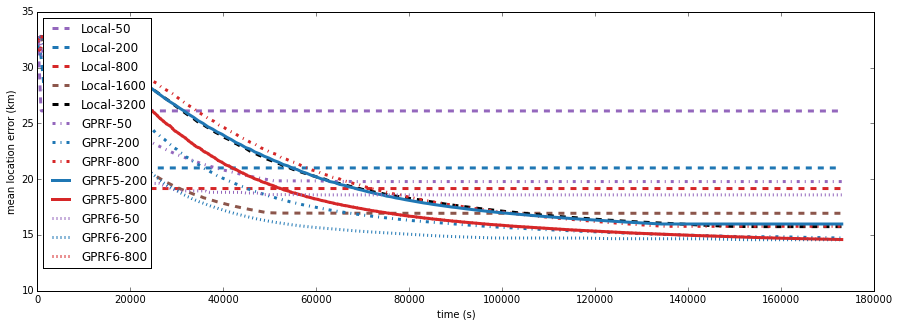

In [8]:
f = plt.figure(figsize=(15, 5))

for (label, r) in seismic_results:
    if len(r.shape) < 2: 
        print label, "is broken"
        continue
    if "-50" in label:
        color = dark_purple
    elif "-200" in label:
        color = dark_blue
    elif "-800" in label:
        color = dark_red
    elif "-1600" in label:
        color = dark_brown
    elif "-3200" in label:
        color = "black"
    
    
    plot(r[:, 1], r[:, 4], label=label, 
         linestyle = "-" if "GPRF5" in label else ":" if "GPRF6" in label else "-." if "GPRF" in label else "--",
         color=color, lw=3)
    
#gca().set_xscale("log")
gca().set_yscale("linear")
#gca().set_xlim([500, 172800])

#gca().set_xlim([0, 50])

gca().legend(loc="upper left")
gca().set_xlabel("time (s)")
gca().set_ylabel("mean location error (km)")

In [9]:
seismic_xcov_runs = \
[("Local-50", "/home/dmoore/python/gprf/seismic_experiments/-1_63_1.0000_default_xcov_40_20.0"),
 ("Local-200", "/home/dmoore/python/gprf/seismic_experiments/-1_213_1.0000_default_xcov_40_20.0"),
 ("Local-800", "/home/dmoore/python/gprf/seismic_experiments/-1_813_1.0000_default_xcov_40_20.0"),
 ("Local-1600", "/home/dmoore/python/gprf/seismic_experiments/-1_1703_1.0000_default_xcov_40_20.0"),
 ("Local-3200", "/home/dmoore/python/gprf/seismic_experiments/-1_3403_1.0000_default_xcov_40_20.0"),
 #("GPRF1-50", "/home/dmoore/python/gprf/seismic_experiments/-1_63_0.1000_default_xcov_40_20.0"),
 #("GPRF1-200", "/home/dmoore/python/gprf/seismic_experiments/-1_213_0.1000_default_xcov_40_20.0"),
 #("GPRF1-800", "/home/dmoore/python/gprf/seismic_experiments/-1_813_0.1000_default_xcov_40_20.0"),
 #("GPRF61-1600", "/home/dmoore/python/gprf/seismic_experiments/-1_1703_0.6000_default_xcov_40_20.0"),
 ("GPRF-50", "/home/dmoore/python/gprf/seismic_experiments/-1_63_0.6000_default_xcov_40_20.0"),
 ("GPRF-200", "/home/dmoore/python/gprf/seismic_experiments/-1_213_0.6000_default_xcov_40_20.0"),
 ("GPRF-800", "/home/dmoore/python/gprf/seismic_experiments/-1_813_0.6000_default_xcov_40_20.0"),
 ("Hybrid-800", "/home/dmoore/python/gprf/seismic_experiments/-1_813_0.6000__384aa160_xcov_40_20.0"),
]

seismic_xcov_results = extend([(label, max_history(load_results(d))) for (label, d) in seismic_xcov_runs])

432307.71


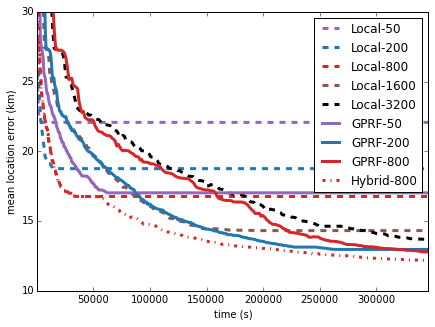

In [10]:
f = plt.figure(figsize=(7, 5))

for (label, r) in seismic_xcov_results:
    if len(r.shape) < 2: 
        print label, "is broken"
        continue
    if "-50" in label:
        color = dark_purple
    elif "-200" in label:
        color = dark_blue
    elif "-800" in label:
        color = dark_red
    elif "-1600" in label:
        color = dark_brown
    elif "-3200" in label:
        color = "black"
    
    plot(r[:, 1], r[:, 4], label=label, 
         linestyle = "-" if "GPRF" in label else "-." if "Hybrid" in label else "--", 
         color=color, lw=3)
    
gca().set_xscale("linear")
gca().set_yscale("linear")
gca().set_xlim([500, 172800*2])

gca().set_ylim([10, 30])

gca().legend(loc="upper right")
gca().set_xlabel("time (s)")
gca().set_ylabel("mean location error (km)")

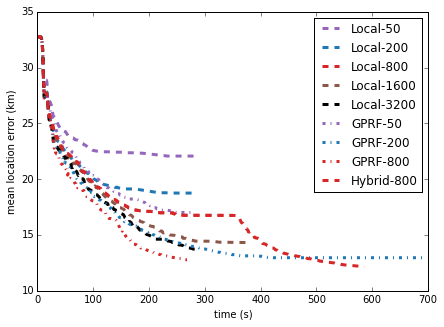

In [11]:
f = plt.figure(figsize=(7, 5))

for (label, r) in seismic_xcov_results:
    if len(r.shape) < 2: 
        print label, "is broken"
        continue
    if "-50" in label:
        color = dark_purple
    elif "-200" in label:
        color = dark_blue
    elif "-800" in label:
        color = dark_red
    elif "-1600" in label:
        color = dark_brown
    elif "-3200" in label:
        color = "black"
    
    plot(r[:, 0], r[:, 4], label=label, 
         linestyle = "-" if "GPRF6" in label else "-." if "GPRF" in label else "--", 
         color=color, lw=3)
    
gca().set_xscale("linear")
gca().set_yscale("linear")
#gca().set_xlim([500, 172800])

#gca().set_ylim([10, 25])

gca().legend(loc="upper right")
gca().set_xlabel("time (s)")
gca().set_ylabel("mean location error (km)")

In [62]:
for (label, r) in seismic_xcov_results:
    print label, r[-1, 4]

Local-50 22.07145946
Local-200 18.75733351
Local-800 17.48422418
Local-1600 14.31499101
Local-3200 13.68810642
GPRF-50 17.02178758
GPRF-200 12.96509859
GPRF-800 12.78178344


# True GP

In [12]:
tgp_runs = \
[("Full GP", "/home/dmoore/gprf_experiments/10000_10500_1_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 ("GPRF-1111", "/home/dmoore/gprf_experiments/10000_10500_9_0.060000_0.020000_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 #("GPRF-25", "/home/dmoore/gprf_experiments/10000_10500_25_0.060000_0.020000_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 #("GPRF-49", "/home/dmoore/gprf_experiments/10000_10500_49_0.060000_0.020000_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 ("GPRF-100", "/home/dmoore/gprf_experiments/10000_10500_100_0.060000_0.020000_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 ("Local-1111", "/home/dmoore/gprf_experiments/10000_10500_9_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 #("Local-25", "/home/dmoore/gprf_experiments/10000_10500_25_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 #("Local-49", "/home/dmoore/gprf_experiments/10000_10500_49_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 ("Local-100", "/home/dmoore/gprf_experiments/10000_10500_100_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0"),
 #("FITC-2000", "/home/dmoore/gprf_experiments/10000_10500_1_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_sparse2000"),
 ("FITC-500", "/home/dmoore/gprf_experiments/10000_10500_1_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_sparse500"),
 ("FITC-500-$\ell$", "/home/dmoore/gprf_experiments/10000_10500_1_0.060000_0.020000_1.0000_50_l-bfgs-b_xcov_-1_0.0100_s0_sparse500"),
 #("FITC-1000", "/home/dmoore/gprf_experiments/10000_10500_1_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_sparse1000"),
 #("FITC-200", "/home/dmoore/gprf_experiments/10000_10500_1_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_sparse200"),
  #("FITC-1000", "/home/dmoore/gprf_experiments/10000_10500_1_0.060000_0.020000_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_sparse1000"),
]

tgp_results = dict(extend([(label, convert_mad(max_history(load_results(d)), 10000)) for (label, d) in tgp_runs]))

18033.32


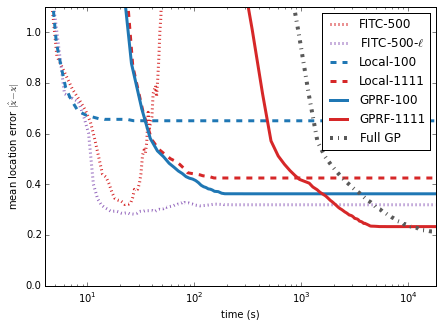

In [13]:
f = plt.figure(figsize=(7, 5))



label_order = ("FITC-500", "FITC-500-$\ell$", "Local-100", "Local-1111", "GPRF-100", "GPRF-1111", "Full GP")
for label in label_order:
    r = tgp_results[label]
    #if "25" in label or "49" in label: continue
    #if "1000" in label: continue
    lw = 3
    if "Full" in label:
        color = dark_grey
        ls = "-."
        lw = 4
    elif "FITC" in label:
        color = dark_purple if "ell" in label else dark_red
        ls = ":"
    elif "Local" in label:
        color = dark_blue if "100" in label else dark_red
        ls = "--"
    elif "GPRF" in label:
        ls = "-"
        color = dark_blue if "100" in label else dark_red

    
    plot(r[:, 1], r[:, 4], label=label, 
         linestyle = ls, 
         color=color, lw=lw)
    
gca().set_xscale("log")
gca().set_yscale("linear")
gca().set_ylim([0, 1.1])

gca().set_xlim([4.0, 18000])

gca().legend(loc="upper right")
gca().set_xlabel("time (s)")
gca().set_ylabel("mean location error $\|\hat{\mathbb{x}}-\mathbb{x}\|$")

In [82]:
print tgp_results["Full GP"][-1]

[  7.60000000e+01   1.80333200e+04   3.90001630e+05   0.00000000e+00
   6.06259212e-01   4.99973373e+04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]


# FITC

In [14]:
from gprfopt_analyze import fitc_run_params
from gprfopt import exp_dir
from collections import defaultdict

runs, runs_by_key = fitc_run_params(obs_std_base=2.0)
dirs_by_key = dict([(key, [exp_dir(r) for r in v]) for (key, v) in runs_by_key.items()])

ntrains = [2000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000]
run_mads = dict()

for key in runs_by_key.keys():
    runs = runs_by_key[key]
    rdirs = dirs_by_key[key]
    for run, rdir in zip(runs, rdirs):
        ntrain = run['ntrain']
        #if run["num_inducing"] == 0:
        #run["task"] = "x"
        #rdir = rdir.replace("_xcov_", "_x_")
        #print run["num_inducing"], run["task"]
        #print key, ntrain, rdir
        try:
            r = convert_mad(max_history(load_results(rdir)), ntrain)
            
            mad = r[-2, 4]
            idx = ntrains.index(ntrain)
            if key not in run_mads:
                run_mads[key] = np.ones((len(ntrains), )) * np.nan            
            run_mads[key][idx] = mad
            print "success at", rdir
        except IOError as e:
            print "could not load", rdir
    
# what form to load in?
# ultimately I want final MAD scores for each ntrain for each method
# so I want a dictionary mapping methods to 
# 15000_15500_1_0.048990_0.020412_1.0000_50_l-bfgs-b_x_-1_0.0100_s0_sparse500/results.txt


2000 target 200 actual 222.222222222
2000 target 400 actual 500.0
5000 target 200 actual 200.0
5000 target 400 actual 555.555555556
10000 target 200 actual 204.081632653
10000 target 400 actual 400.0
15000 target 200 actual 234.375
15000 target 400 actual 416.666666667
20000 target 200 actual 200.0
20000 target 400 actual 408.163265306
25000 target 200 actual 206.611570248
25000 target 400 actual 510.204081633
30000 target 200 actual 208.333333333
30000 target 400 actual 468.75
35000 target 200 actual 207.100591716
35000 target 400 actual 432.098765432
40000 target 200 actual 204.081632653
40000 target 400 actual 400.0
45000 target 200 actual 200.0
45000 target 400 actual 450.0
50000 target 200 actual 222.222222222
50000 target 400 actual 413.223140496
55000 target 200 actual 214.84375
55000 target 400 actual 454.545454545
60000 target 200 actual 207.612456747
60000 target 400 actual 416.666666667
65000 target 200 actual 200.617283951
65000 target 400 actual 451.388888889
70000 target 

 /home/dmoore/.virtualenvs/gprf/local/lib/python2.7/site-packages/matplotlib/scale.py:100: RuntimeWarning:invalid value encountered in less_equal


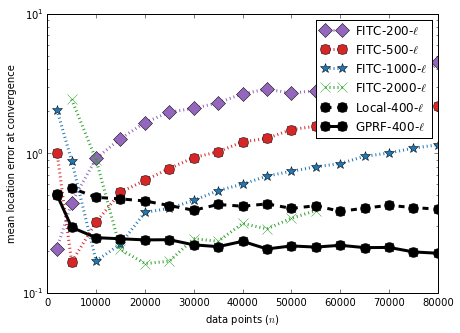

In [15]:
f = plt.figure(figsize=(7, 5))

block_colors = {"200": "purple"}
label_order = ("FITC-200", "FITC-500", "FITC-1000", "FITC-2000", "Local-400",  "GPRF-400", )
for label in label_order:
    r = run_mads[label]
    marker="o"
    ls = "-" if "GPRF" in label else "--" if "Local" in label else ":" if "FITC" in label else "-"

    c = label.split("-")
    label = "%s-%s-$\ell$" % (c[0], c[1])
    
    if "Full" in label:
        color = "black"
    elif "FITC" in label:
        if "500" in label:
            color = dark_red
        elif "1000" in label:
            color = dark_blue
            marker = "*"
        elif "2000" in label:
            color = dark_green
            marker = "x"
        elif "200" in label:
            color = dark_purple
            marker = "D"
        elif "4000" in label:
            color = dark_brown
            marker = "^"
            ls = "-."
    else:
        color = "black"
    lw = 3 
    plot(ntrains, r, label=label, 
         linestyle = ls, 
         color=color, lw=lw, 
         marker=marker,ms=10)
    
ax = gca()
ax.set_xscale("linear")
ax.set_yscale("log")
#gca().set_ylim([0, 10])

#ax.set_xlim([0, 32000])

ax.legend(loc="upper right")
ax.set_xlabel("data points ($n$)")
ax.set_ylabel("mean location error at convergence")


In [16]:
import gprf
from gprfopt import SampledData
import cPickle as pickle

with open("/home/dmoore/gprf_experiments/synthetic_datasets/10500_10000_0.060000_0.020000_50_0.pkl", 'rb') as f:
    sdata = pickle.load(f)
    
XX = np.load("/home/dmoore/gprf_experiments/10000_10500_100_0.060000_0.020000_0.1000_50_l-bfgs-b_x_-1_0.0100_s0_gprf0/step_00032_X.npy") * 100

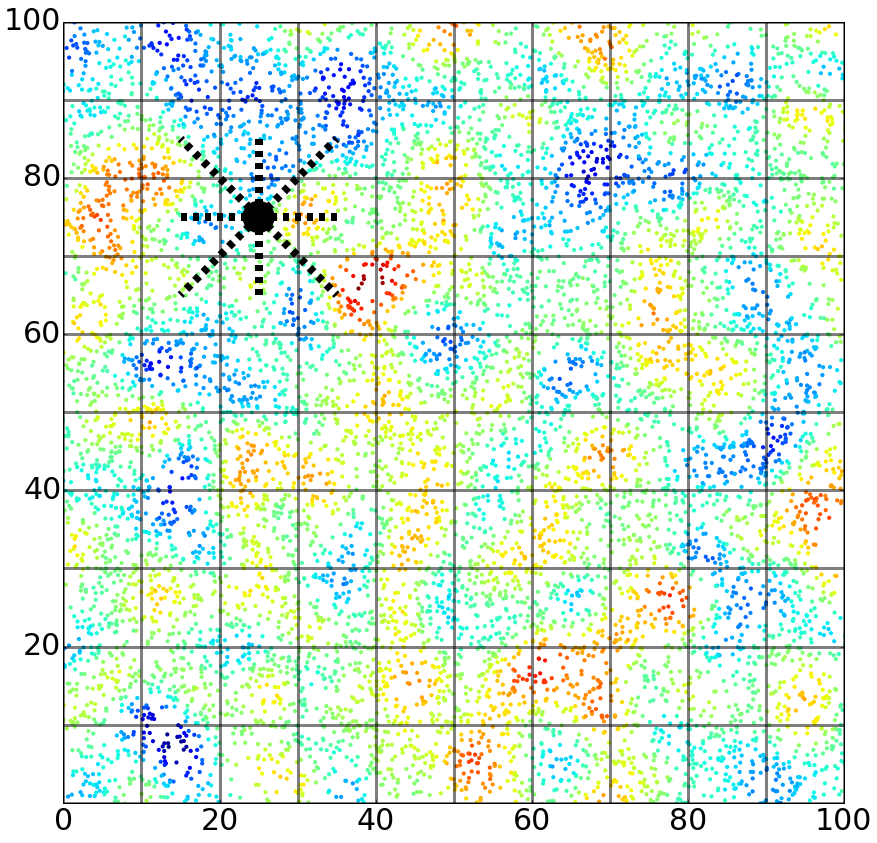

In [17]:
f = plt.figure(figsize=(14,14))

X = sdata.X_obs * 100
c = sdata.SY[:, 0]


scatter(XX[:, 0], XX[:, 1], s=70, marker=".", lw=0, c=c, cmap="jet", alpha=1.0)
gca().set_xlim((0, 100))
gca().set_ylim((0, 100))



plt.hlines(np.linspace(0, 100, 11), 0, 100, color="black", lw=3, alpha=0.5)
plt.vlines(np.linspace(0, 100, 11), 0, 100, color="black", lw=3, alpha=0.5)

step = 100.0/10
gcolor = "k"

center = np.array((2.5, 7.5))*step
circle1=plt.Circle(center,step/5.0,color=gcolor)
gca().add_artist(circle1)
ls = "--"
plot((2.5*step, 3.5*step), (7.5*step, 6.5*step), lw=8, color=gcolor, ls=ls)
plot((2.5*step, 3.5*step), (7.5*step, 7.5*step), lw=8, color=gcolor, ls=ls)
plot((2.5*step, 3.5*step), (7.5*step, 8.5*step), lw=8, color=gcolor, ls=ls)
plot((2.5*step, 1.5*step), (7.5*step, 6.5*step), lw=8, color=gcolor, ls=ls)
plot((2.5*step, 1.5*step), (7.5*step, 7.5*step), lw=8, color=gcolor, ls=ls)
plot((2.5*step, 1.5*step), (7.5*step, 8.5*step), lw=8, color=gcolor, ls=ls)
plot((2.5*step, 2.5*step), (7.5*step, 6.5*step), lw=8, color=gcolor, ls=ls)
plot((2.5*step, 2.5*step), (7.5*step, 8.5*step), lw=8, color=gcolor, ls=ls)

gca().set_yticks([20, 40, 60, 80, 100])
gca().tick_params(axis='x', labelsize=30)
gca().tick_params(axis='y', labelsize=30)